<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [14]:
import numpy as np
import os

folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\cwtnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with CWT naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_5.npy'))

# #generate random arrays for now
# eeg_fold_1 = np.random.rand(10, 224, 224,3)
# labels_fold_1 = np.random.randint(0, 3, 10)
# patients_fold_1 = np.random.randint(1, 11, 10)

# eeg_fold_2 = np.random.rand(10, 224, 224,3)
# labels_fold_2 = np.random.randint(0, 3, 10)
# patients_fold_2 = np.random.randint(1, 11, 10)

# eeg_fold_3 = np.random.rand(10, 224, 224,3)
# labels_fold_3 = np.random.randint(0, 3, 10)
# patients_fold_3 = np.random.randint(1, 11, 10)

# eeg_fold_4 = np.random.rand(10, 224, 224,3)
# labels_fold_4 = np.random.randint(0, 3, 10)
# patients_fold_4 = np.random.randint(1, 11, 10)

# eeg_fold_5 = np.random.rand(10, 224, 224,3)
# labels_fold_5 = np.random.randint(0, 3, 10)
# patients_fold_5 = np.random.randint(1, 11, 10)

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [15]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [16]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [17]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """

    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()

    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()

    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [19]:
import torch
import torch.nn as nn

class LstmAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super(LstmAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers > 1 else 0
        )

        self.attention = nn.MultiheadAttention(embed_dim=hidden_size * 2, num_heads=2, batch_first=True)

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.act = nn.Sigmoid() if num_classes == 1 else nn.Softmax(dim=1)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        lstm_out, _ = self.lstm(x)  # (batch, seq, hidden*2)

        # Apply attention: Q=K=V=lstm_out
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)  # (batch, seq, hidden*2)

        # Aggregate via mean pooling or use only last time step
        pooled = attn_out.mean(dim=1)  # (batch, hidden*2)

        out = self.dropout(pooled)
        out = self.fc(out)
        return self.act(out)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [20]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Suppose input is (batch, 224, 672) → for spectrogram shape (224, 224, 3)
# Flatten last two dims: 224 time steps, 672 features
input_size = 224 * 3
hidden_size = 128
num_layers = 1
num_classes = 3  # Binary classification (e.g., seizure vs. no seizure)

model = LstmAttention(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes)
model.to(device)

# Dummy input
x = torch.randn(8, 224, 672).to(device)  # batch_size=8
output = model(x)
print(output.shape)  # Expect: (8, 1)


torch.Size([8, 3])


In [21]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                             Param #
LstmAttention                                      --
├─LSTM: 1-1                                        821,248
├─MultiheadAttention: 1-2                          197,376
│    └─NonDynamicallyQuantizableLinear: 2-1        65,792
├─Dropout: 1-3                                     --
├─Linear: 1-4                                      771
├─Softmax: 1-5                                     --
Total params: 1,085,187
Trainable params: 1,085,187
Non-trainable params: 0

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


RUNNING PARAMETER SET 1/5
Parameters: {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.4, 'learning_rate': 6.339492809821357e-05, 'weight_decay': 5.137548693679295e-06, 'batch_size': 16, 'optimizer_name': 'Adam', 'label_smoothing': 0.3, 'factor': 1}

Fold No: 1
Epoch [1/100], Loss: 0.6862, Accuracy: 0.5651
Validation Loss: 0.6374, Validation Accuracy: 0.6501
Epoch [2/100], Loss: 0.6589, Accuracy: 0.6536
Validation Loss: 0.6300, Validation Accuracy: 0.6727
Epoch [3/100], Loss: 0.6509, Accuracy: 0.6874
Validation Loss: 0.6177, Validation Accuracy: 0.5996
Epoch [4/100], Loss: 0.6362, Accuracy: 0.7122
Validation Loss: 0.6471, Validation Accuracy: 0.7192
Epoch [5/100], Loss: 0.6311, Accuracy: 0.7251
Validation Loss: 0.6014, Validation Accuracy: 0.6848
Epoch [6/100], Loss: 0.6310, Accuracy: 0.7132
Validation Loss: 0.6521, Validation Accuracy: 0.7136
Epoch [7/100], Loss: 0.6263, Accuracy: 0.7296
Validation Loss: 0.6225, Validation Accuracy: 0.7150
Epoch [8/100], Loss: 0.6166, Accuracy: 0.7

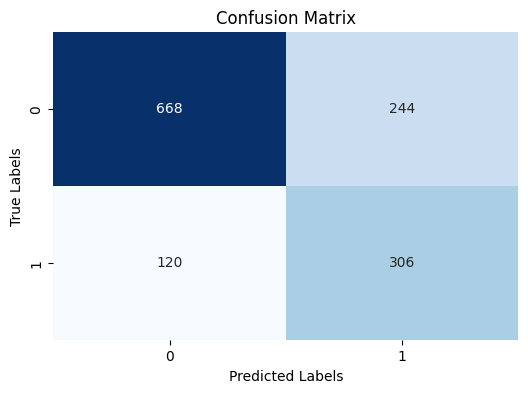


Class-wise Accuracy:
Class 0: 668/912 (73.25%)
Class 1: 306/426 (71.83%)

Precision-Recall Curve:


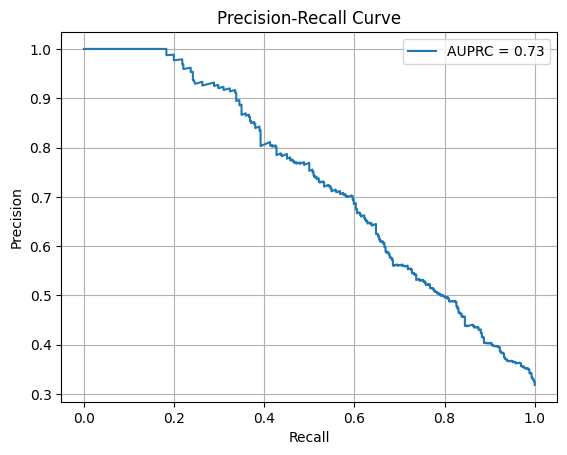


ROC Curve:


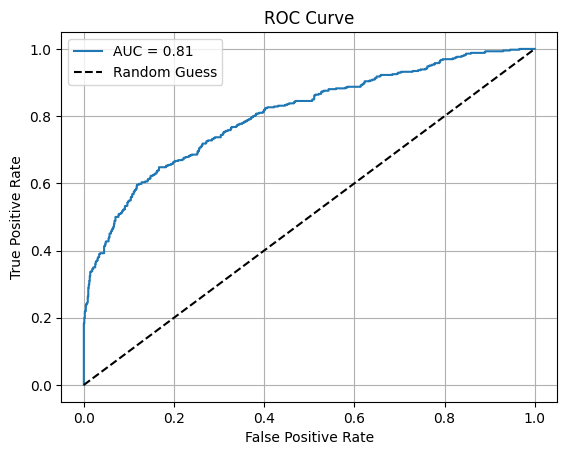


Mean F1 Score: 0.7065
Balanced Accuracy: 0.7254
Average AUPRC: 0.7297

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       912
           1       0.56      0.72      0.63       426

    accuracy                           0.73      1338
   macro avg       0.70      0.73      0.71      1338
weighted avg       0.75      0.73      0.74      1338

Fold No: 2
Epoch [1/100], Loss: 0.6916, Accuracy: 0.5244
Validation Loss: 0.6743, Validation Accuracy: 0.6190
Epoch [2/100], Loss: 0.6477, Accuracy: 0.6865
Validation Loss: 0.6516, Validation Accuracy: 0.6725
Epoch [3/100], Loss: 0.6318, Accuracy: 0.7205
Validation Loss: 0.6257, Validation Accuracy: 0.6416
Epoch [4/100], Loss: 0.6322, Accuracy: 0.7217
Validation Loss: 0.7168, Validation Accuracy: 0.6416
Epoch [5/100], Loss: 0.6251, Accuracy: 0.7300
Validation Loss: 0.6357, Validation Accuracy: 0.7063
Epoch [6/100], Loss: 0.6187, Accuracy: 0.7455
Validation Loss: 0.6345, V

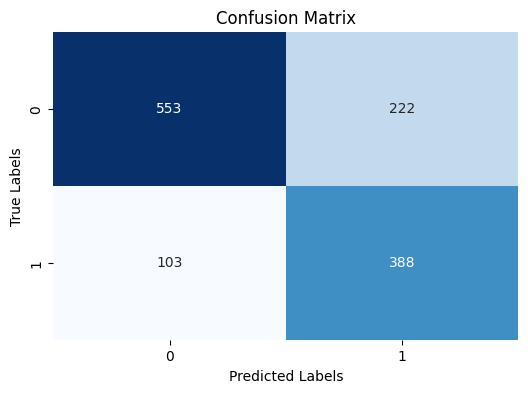


Class-wise Accuracy:
Class 0: 553/775 (71.35%)
Class 1: 388/491 (79.02%)

Precision-Recall Curve:


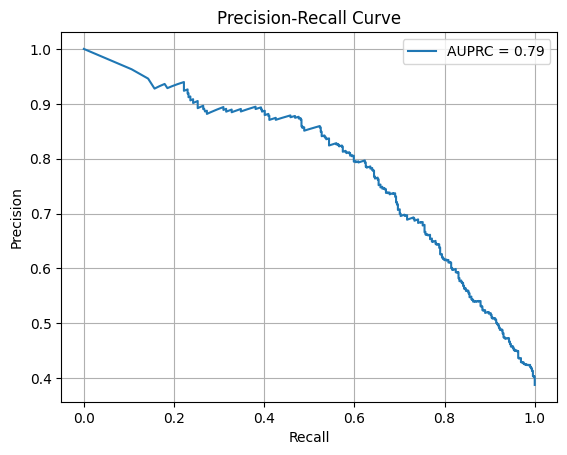


ROC Curve:


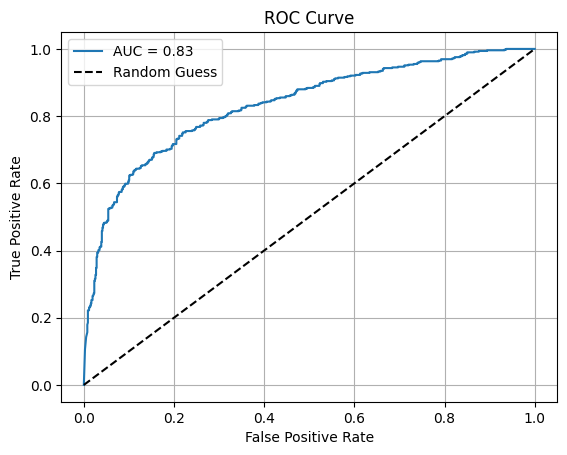


Mean F1 Score: 0.7388
Balanced Accuracy: 0.7519
Average AUPRC: 0.7882

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       775
           1       0.64      0.79      0.70       491

    accuracy                           0.74      1266
   macro avg       0.74      0.75      0.74      1266
weighted avg       0.76      0.74      0.75      1266

Fold No: 3
Epoch [1/100], Loss: 0.6923, Accuracy: 0.5165
Validation Loss: 0.6837, Validation Accuracy: 0.5607
Epoch [2/100], Loss: 0.6570, Accuracy: 0.6663
Validation Loss: 0.6535, Validation Accuracy: 0.6256
Epoch [3/100], Loss: 0.6481, Accuracy: 0.6802
Validation Loss: 0.6694, Validation Accuracy: 0.6612
Epoch [4/100], Loss: 0.6357, Accuracy: 0.7052
Validation Loss: 0.6569, Validation Accuracy: 0.6709
Epoch [5/100], Loss: 0.6348, Accuracy: 0.7170
Validation Loss: 0.6380, Validation Accuracy: 0.6755
Epoch [6/100], Loss: 0.6239, Accuracy: 0.7361
Validation Loss: 0.6374, V

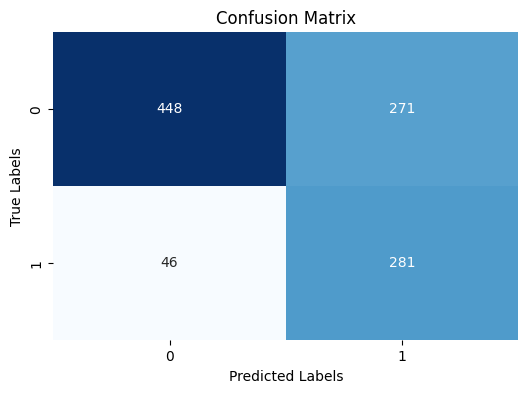


Class-wise Accuracy:
Class 0: 448/719 (62.31%)
Class 1: 281/327 (85.93%)

Precision-Recall Curve:


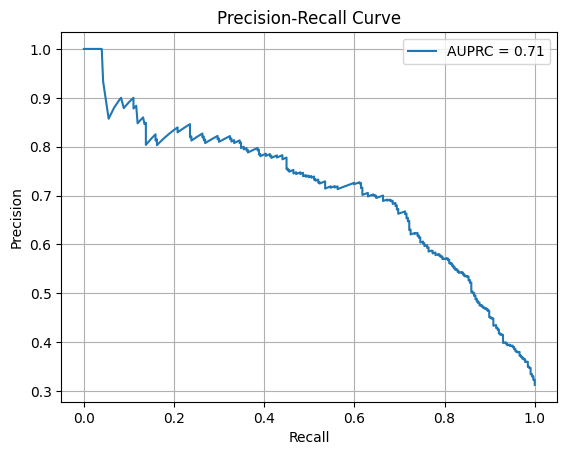


ROC Curve:


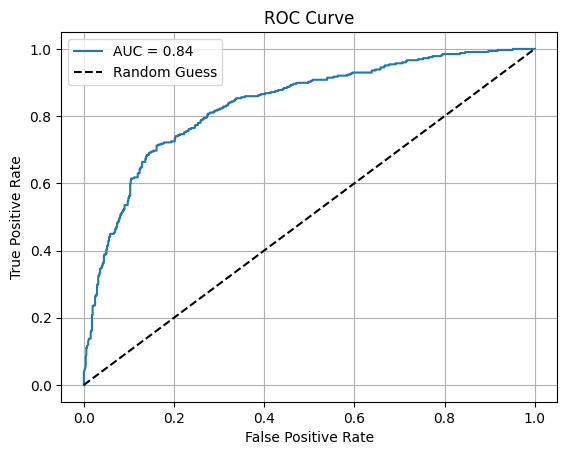


Mean F1 Score: 0.6890
Balanced Accuracy: 0.7412
Average AUPRC: 0.7104

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       719
           1       0.51      0.86      0.64       327

    accuracy                           0.70      1046
   macro avg       0.71      0.74      0.69      1046
weighted avg       0.78      0.70      0.71      1046

Fold No: 4
Epoch [1/100], Loss: 0.6881, Accuracy: 0.5552
Validation Loss: 0.6245, Validation Accuracy: 0.6730
Epoch [2/100], Loss: 0.6646, Accuracy: 0.6402
Validation Loss: 0.6396, Validation Accuracy: 0.7101
Epoch [3/100], Loss: 0.6581, Accuracy: 0.6507
Validation Loss: 0.6206, Validation Accuracy: 0.7179
Epoch [4/100], Loss: 0.6421, Accuracy: 0.6962
Validation Loss: 0.6350, Validation Accuracy: 0.7311
Epoch [5/100], Loss: 0.6360, Accuracy: 0.7051
Validation Loss: 0.6061, Validation Accuracy: 0.6951
Epoch [6/100], Loss: 0.6396, Accuracy: 0.7006
Validation Loss: 0.6415, V

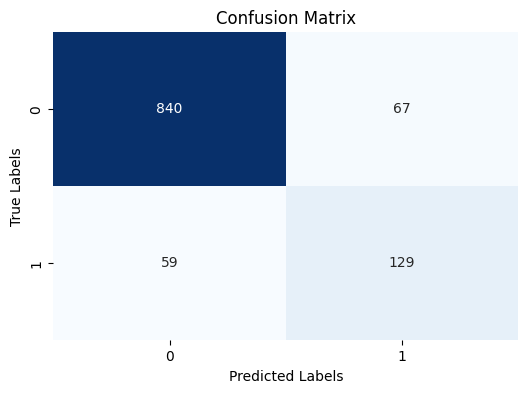


Class-wise Accuracy:
Class 0: 840/907 (92.61%)
Class 1: 129/188 (68.62%)

Precision-Recall Curve:


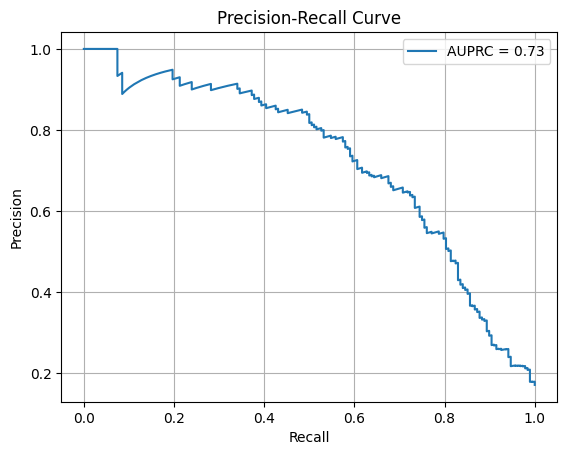


ROC Curve:


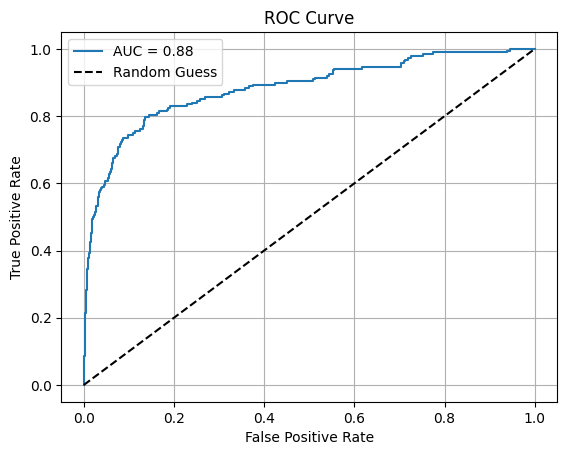


Mean F1 Score: 0.8011
Balanced Accuracy: 0.8062
Average AUPRC: 0.7262

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       907
           1       0.66      0.69      0.67       188

    accuracy                           0.88      1095
   macro avg       0.80      0.81      0.80      1095
weighted avg       0.89      0.88      0.89      1095

Fold No: 5
Epoch [1/100], Loss: 0.6893, Accuracy: 0.5494
Validation Loss: 0.6563, Validation Accuracy: 0.6814
Epoch [2/100], Loss: 0.6539, Accuracy: 0.6789
Validation Loss: 0.5987, Validation Accuracy: 0.7196
Epoch [3/100], Loss: 0.6436, Accuracy: 0.6893
Validation Loss: 0.6294, Validation Accuracy: 0.7172
Epoch [4/100], Loss: 0.6337, Accuracy: 0.7098
Validation Loss: 0.5918, Validation Accuracy: 0.7591
Epoch [5/100], Loss: 0.6371, Accuracy: 0.6949
Validation Loss: 0.6806, Validation Accuracy: 0.7018
Epoch [6/100], Loss: 0.6313, Accuracy: 0.7195
Validation Loss: 0.5897, V

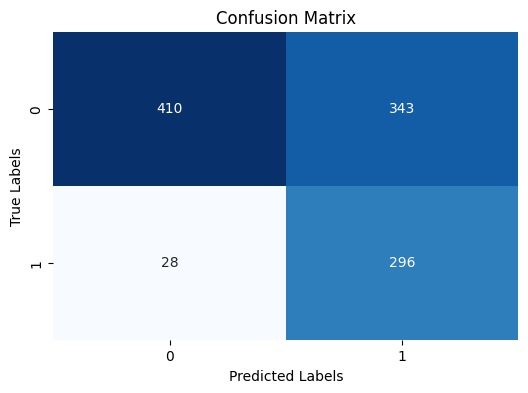


Class-wise Accuracy:
Class 0: 410/753 (54.45%)
Class 1: 296/324 (91.36%)

Precision-Recall Curve:


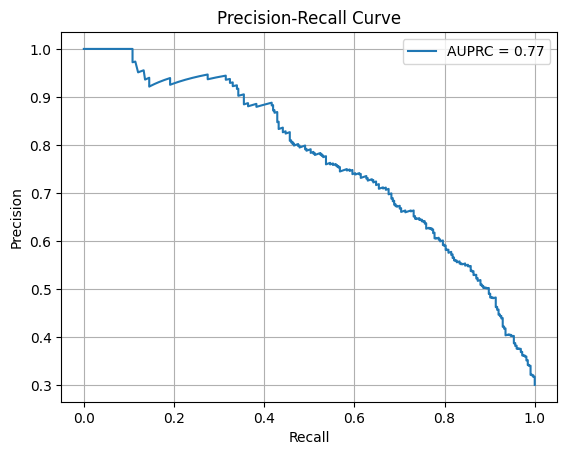


ROC Curve:


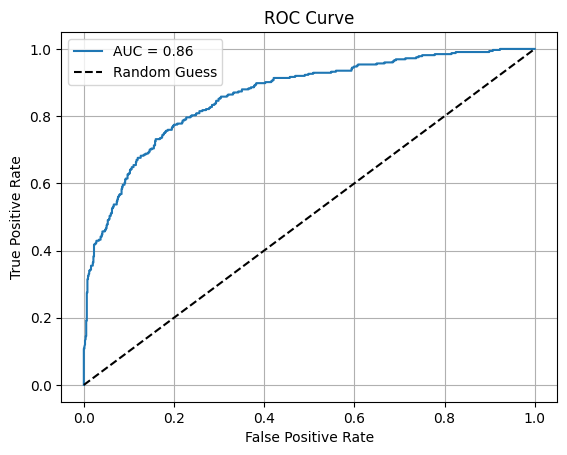


Mean F1 Score: 0.6516
Balanced Accuracy: 0.7290
Average AUPRC: 0.7681

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.54      0.69       753
           1       0.46      0.91      0.61       324

    accuracy                           0.66      1077
   macro avg       0.70      0.73      0.65      1077
weighted avg       0.79      0.66      0.67      1077


PARAMETER SET 1 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7254
   Fold 2: 0.7519
   Fold 3: 0.7412
   Fold 4: 0.8062
   Fold 5: 0.7290

2) Average balanced accuracy across all folds: 0.7507

3) Average AUPRC across all folds: 0.7445

4) AUPRC per fold:
   Fold 1: 0.7297
   Fold 2: 0.7882
   Fold 3: 0.7104
   Fold 4: 0.7262
   Fold 5: 0.7681

5) Best fold class-wise accuracy (Fold 4):
   Class 0: 0.9261
   Class 1: 0.6862


RUNNING PARAMETER SET 2/5
Parameters: {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.30000000000000004, 'learning_rate': 1

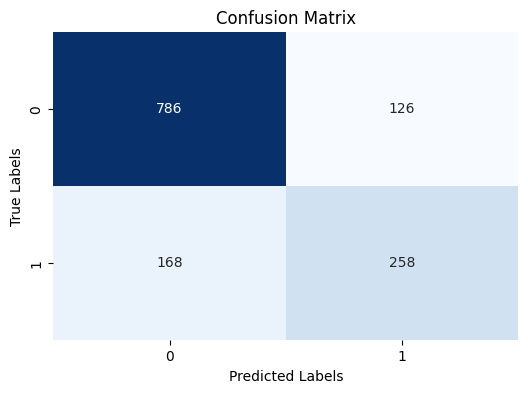


Class-wise Accuracy:
Class 0: 786/912 (86.18%)
Class 1: 258/426 (60.56%)

Precision-Recall Curve:


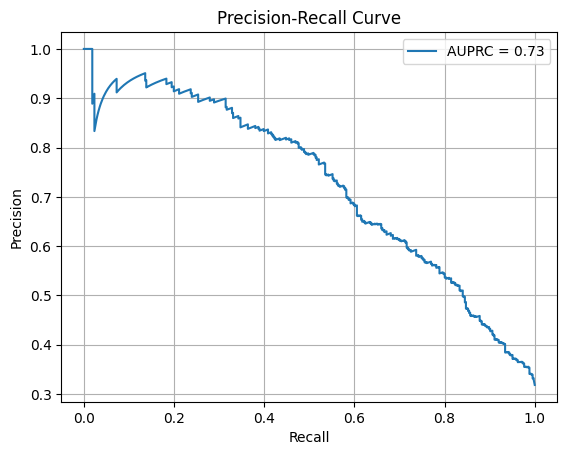


ROC Curve:


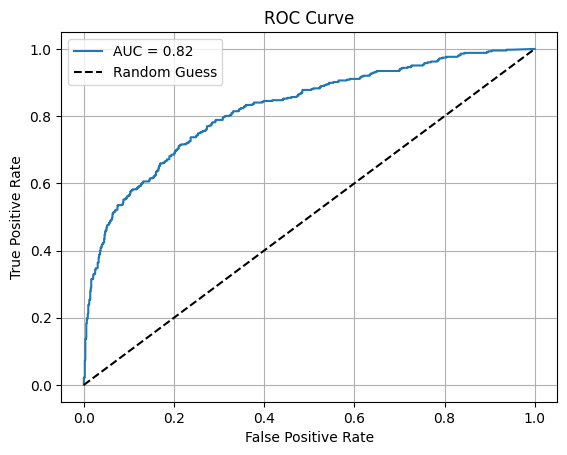


Mean F1 Score: 0.7397
Balanced Accuracy: 0.7337
Average AUPRC: 0.7262

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       912
           1       0.67      0.61      0.64       426

    accuracy                           0.78      1338
   macro avg       0.75      0.73      0.74      1338
weighted avg       0.78      0.78      0.78      1338

Fold No: 2
Epoch [1/100], Loss: 0.6904, Accuracy: 0.5793
Validation Loss: 0.6890, Validation Accuracy: 0.6188
Epoch [2/100], Loss: 0.6859, Accuracy: 0.6323
Validation Loss: 0.6866, Validation Accuracy: 0.6208
Epoch [3/100], Loss: 0.6798, Accuracy: 0.6597
Validation Loss: 0.6813, Validation Accuracy: 0.6289
Epoch [4/100], Loss: 0.6737, Accuracy: 0.6883
Validation Loss: 0.6743, Validation Accuracy: 0.6419
Epoch [5/100], Loss: 0.6686, Accuracy: 0.6913
Validation Loss: 0.6738, Validation Accuracy: 0.6353
Epoch [6/100], Loss: 0.6612, Accuracy: 0.6979
Validation Loss: 0.6674, V

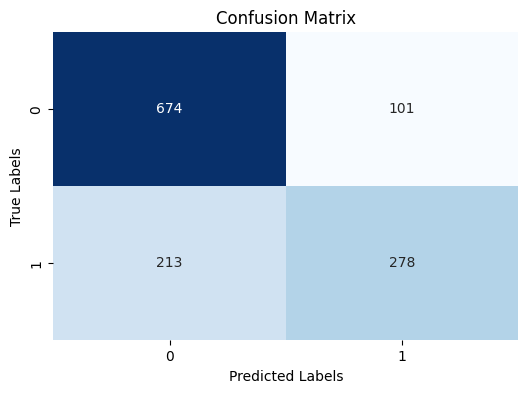


Class-wise Accuracy:
Class 0: 674/775 (86.97%)
Class 1: 278/491 (56.62%)

Precision-Recall Curve:


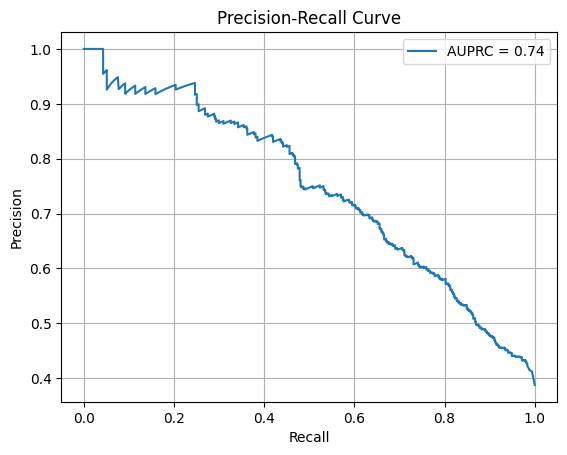


ROC Curve:


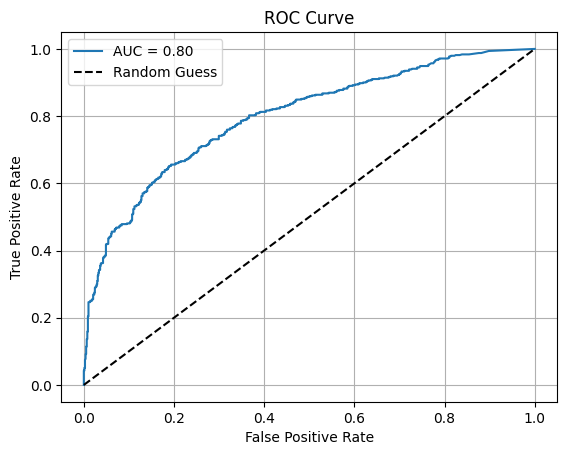


Mean F1 Score: 0.7251
Balanced Accuracy: 0.7179
Average AUPRC: 0.7444

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       775
           1       0.73      0.57      0.64       491

    accuracy                           0.75      1266
   macro avg       0.75      0.72      0.73      1266
weighted avg       0.75      0.75      0.74      1266

Fold No: 3
Epoch [1/100], Loss: 0.6924, Accuracy: 0.5181
Validation Loss: 0.6908, Validation Accuracy: 0.5680
Epoch [2/100], Loss: 0.6875, Accuracy: 0.5965
Validation Loss: 0.6887, Validation Accuracy: 0.6019
Epoch [3/100], Loss: 0.6841, Accuracy: 0.6285
Validation Loss: 0.6848, Validation Accuracy: 0.6029
Epoch [4/100], Loss: 0.6802, Accuracy: 0.6594
Validation Loss: 0.6827, Validation Accuracy: 0.6304
Epoch [5/100], Loss: 0.6746, Accuracy: 0.6706
Validation Loss: 0.6821, Validation Accuracy: 0.6153
Epoch [6/100], Loss: 0.6694, Accuracy: 0.6722
Validation Loss: 0.6748, V

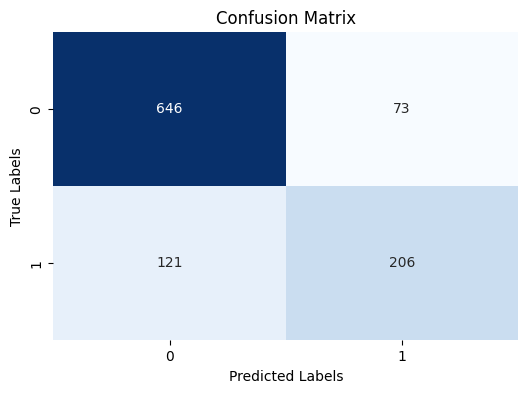


Class-wise Accuracy:
Class 0: 646/719 (89.85%)
Class 1: 206/327 (63.00%)

Precision-Recall Curve:


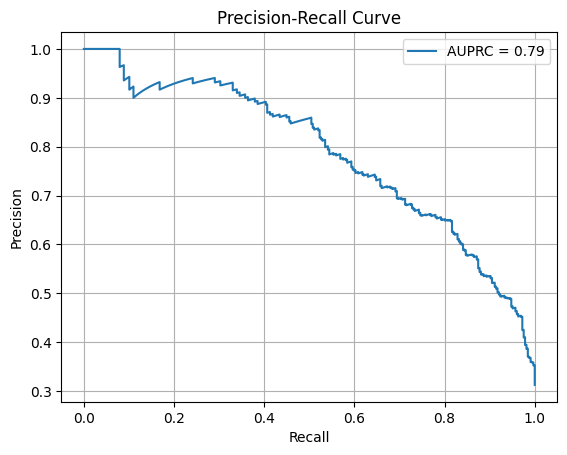


ROC Curve:


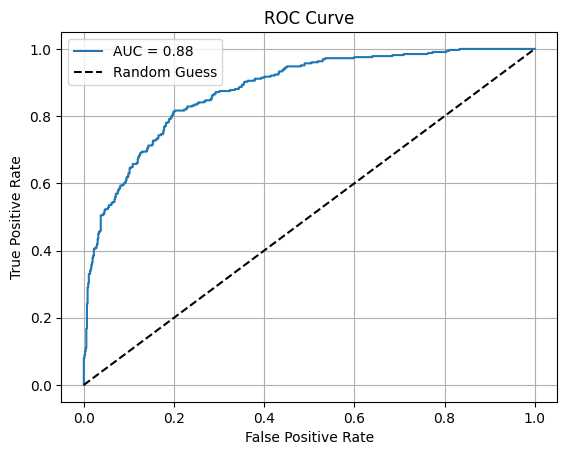


Mean F1 Score: 0.7747
Balanced Accuracy: 0.7642
Average AUPRC: 0.7858

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       719
           1       0.74      0.63      0.68       327

    accuracy                           0.81      1046
   macro avg       0.79      0.76      0.77      1046
weighted avg       0.81      0.81      0.81      1046

Fold No: 4
Epoch [1/100], Loss: 0.6924, Accuracy: 0.5145
Validation Loss: 0.6837, Validation Accuracy: 0.5916
Epoch [2/100], Loss: 0.6875, Accuracy: 0.5943
Validation Loss: 0.6862, Validation Accuracy: 0.6557
Epoch [3/100], Loss: 0.6832, Accuracy: 0.6221
Validation Loss: 0.6771, Validation Accuracy: 0.6802
Epoch [4/100], Loss: 0.6787, Accuracy: 0.6317
Validation Loss: 0.6717, Validation Accuracy: 0.6912
Epoch [5/100], Loss: 0.6732, Accuracy: 0.6579
Validation Loss: 0.6619, Validation Accuracy: 0.6980
Epoch [6/100], Loss: 0.6681, Accuracy: 0.6732
Validation Loss: 0.6559, V

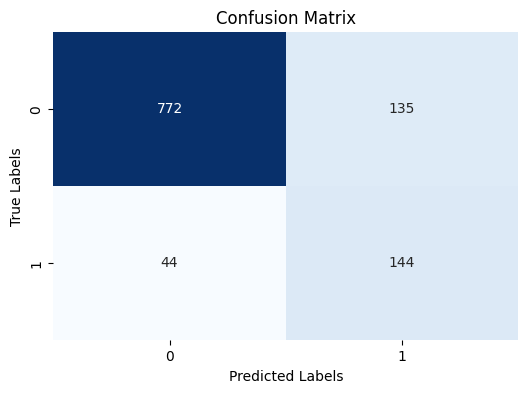


Class-wise Accuracy:
Class 0: 772/907 (85.12%)
Class 1: 144/188 (76.60%)

Precision-Recall Curve:


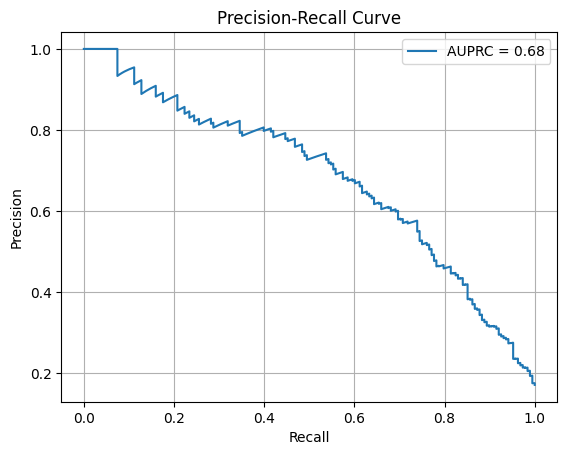


ROC Curve:


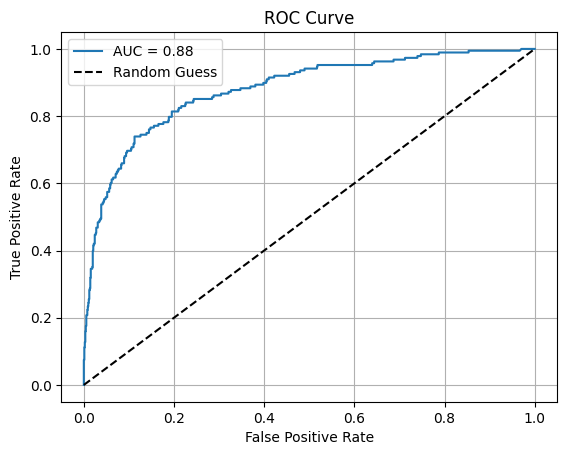


Mean F1 Score: 0.7564
Balanced Accuracy: 0.8086
Average AUPRC: 0.6821

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       907
           1       0.52      0.77      0.62       188

    accuracy                           0.84      1095
   macro avg       0.73      0.81      0.76      1095
weighted avg       0.87      0.84      0.85      1095

Fold No: 5
Epoch [1/100], Loss: 0.6910, Accuracy: 0.5454
Validation Loss: 0.6888, Validation Accuracy: 0.6221
Epoch [2/100], Loss: 0.6861, Accuracy: 0.6021
Validation Loss: 0.6937, Validation Accuracy: 0.5680
Epoch [3/100], Loss: 0.6805, Accuracy: 0.6282
Validation Loss: 0.6768, Validation Accuracy: 0.6314
Epoch [4/100], Loss: 0.6743, Accuracy: 0.6527
Validation Loss: 0.6840, Validation Accuracy: 0.5967
Epoch [5/100], Loss: 0.6694, Accuracy: 0.6568
Validation Loss: 0.6604, Validation Accuracy: 0.6712
Epoch [6/100], Loss: 0.6629, Accuracy: 0.6789
Validation Loss: 0.6794, V

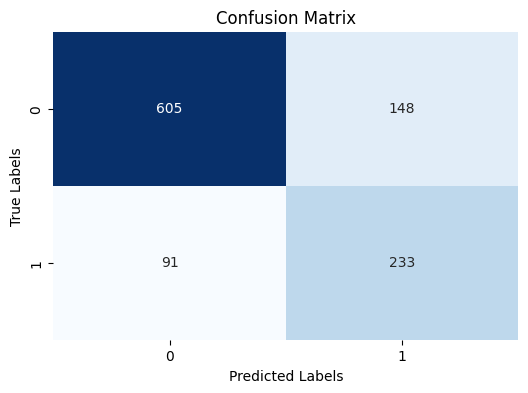


Class-wise Accuracy:
Class 0: 605/753 (80.35%)
Class 1: 233/324 (71.91%)

Precision-Recall Curve:


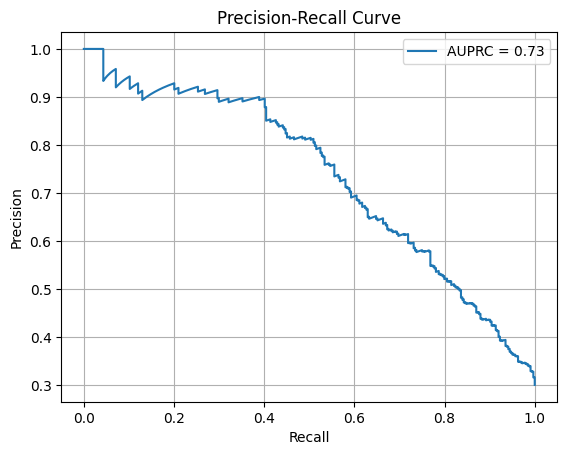


ROC Curve:


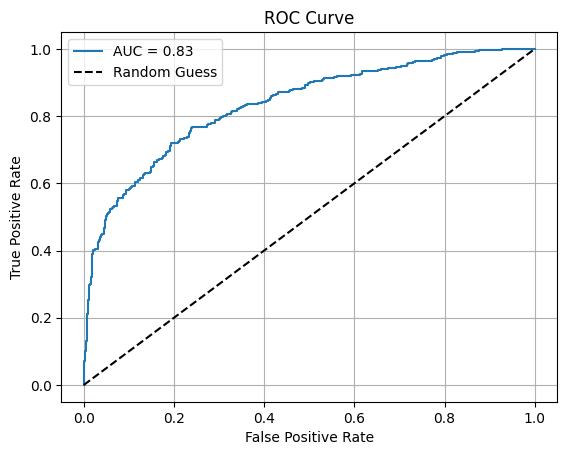


Mean F1 Score: 0.7480
Balanced Accuracy: 0.7613
Average AUPRC: 0.7346

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       753
           1       0.61      0.72      0.66       324

    accuracy                           0.78      1077
   macro avg       0.74      0.76      0.75      1077
weighted avg       0.79      0.78      0.78      1077


PARAMETER SET 2 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7337
   Fold 2: 0.7179
   Fold 3: 0.7642
   Fold 4: 0.8086
   Fold 5: 0.7613

2) Average balanced accuracy across all folds: 0.7571

3) Average AUPRC across all folds: 0.7346

4) AUPRC per fold:
   Fold 1: 0.7262
   Fold 2: 0.7444
   Fold 3: 0.7858
   Fold 4: 0.6821
   Fold 5: 0.7346

5) Best fold class-wise accuracy (Fold 4):
   Class 0: 0.8512
   Class 1: 0.7660


RUNNING PARAMETER SET 3/5
Parameters: {'hidden_size': 1024, 'num_layers': 2, 'dropout': 0.5, 'learning_rate': 0.00032747731661

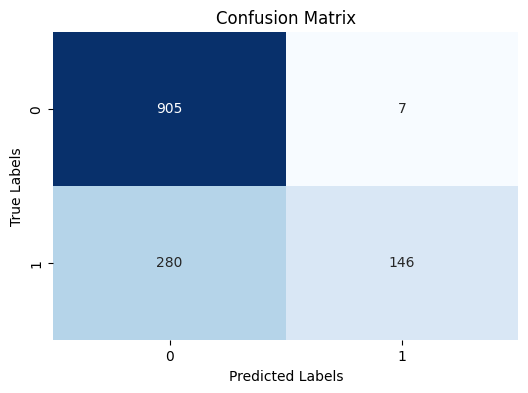


Class-wise Accuracy:
Class 0: 905/912 (99.23%)
Class 1: 146/426 (34.27%)

Precision-Recall Curve:


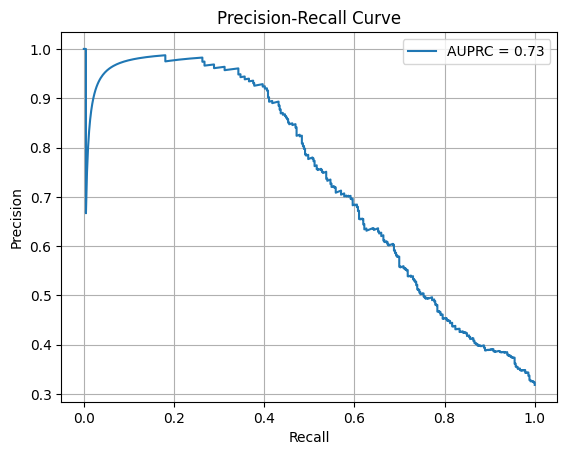


ROC Curve:


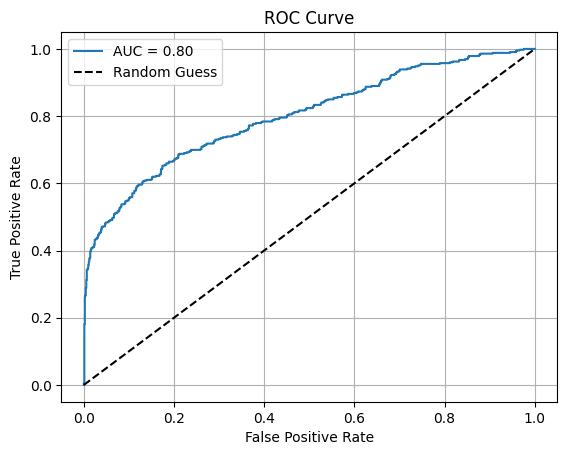


Mean F1 Score: 0.6837
Balanced Accuracy: 0.6675
Average AUPRC: 0.7346

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       912
           1       0.95      0.34      0.50       426

    accuracy                           0.79      1338
   macro avg       0.86      0.67      0.68      1338
weighted avg       0.82      0.79      0.75      1338

Fold No: 2
Epoch [1/100], Loss: 0.6893, Accuracy: 0.5685
Validation Loss: 0.6924, Validation Accuracy: 0.5590
Epoch [2/100], Loss: 0.6692, Accuracy: 0.6418
Validation Loss: 0.6563, Validation Accuracy: 0.4998
Epoch [3/100], Loss: 0.6794, Accuracy: 0.6037
Validation Loss: 0.6343, Validation Accuracy: 0.6406
Epoch [4/100], Loss: 0.6734, Accuracy: 0.6156
Validation Loss: 0.6668, Validation Accuracy: 0.5000
Epoch [5/100], Loss: 0.6837, Accuracy: 0.5799
Validation Loss: 0.6684, Validation Accuracy: 0.6768
Epoch [6/100], Loss: 0.6774, Accuracy: 0.5977
Validation Loss: 0.6450, V

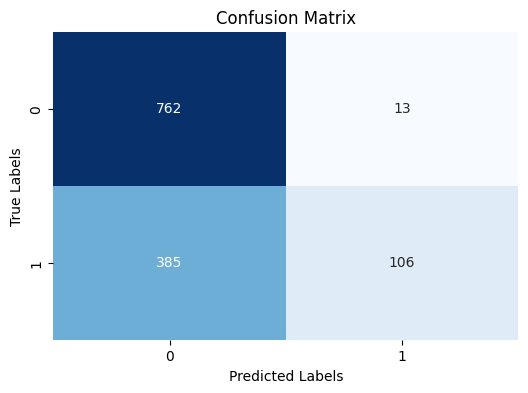


Class-wise Accuracy:
Class 0: 762/775 (98.32%)
Class 1: 106/491 (21.59%)

Precision-Recall Curve:


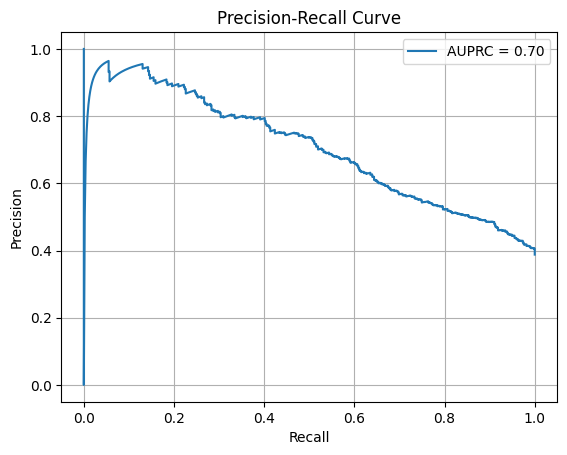


ROC Curve:


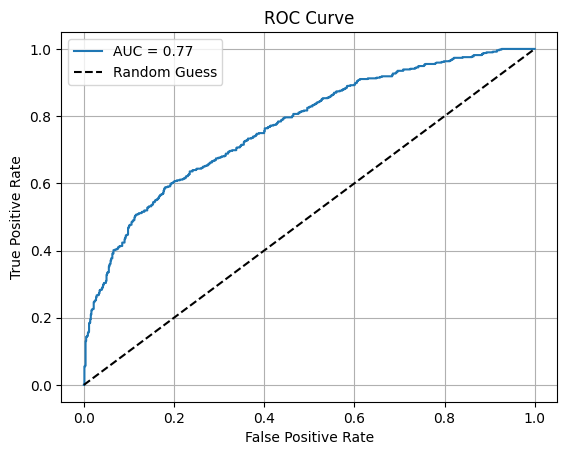


Mean F1 Score: 0.5702
Balanced Accuracy: 0.5996
Average AUPRC: 0.7023

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       775
           1       0.89      0.22      0.35       491

    accuracy                           0.69      1266
   macro avg       0.78      0.60      0.57      1266
weighted avg       0.75      0.69      0.62      1266

Fold No: 3
Epoch [1/100], Loss: 0.6966, Accuracy: 0.5389
Validation Loss: 0.6731, Validation Accuracy: 0.6336
Epoch [2/100], Loss: 0.6735, Accuracy: 0.6269
Validation Loss: 0.6826, Validation Accuracy: 0.6269
Epoch [3/100], Loss: 0.6635, Accuracy: 0.6375
Validation Loss: 0.6625, Validation Accuracy: 0.5735
Epoch [4/100], Loss: 0.6536, Accuracy: 0.6631
Validation Loss: 0.6523, Validation Accuracy: 0.6138
Epoch [5/100], Loss: 0.6488, Accuracy: 0.6908
Validation Loss: 0.6467, Validation Accuracy: 0.6480
Epoch [6/100], Loss: 0.6698, Accuracy: 0.6365
Validation Loss: 0.6575, V

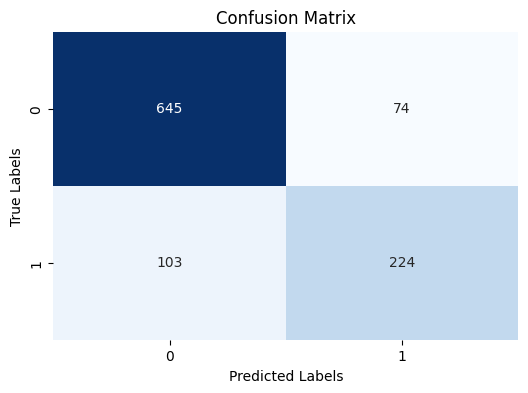


Class-wise Accuracy:
Class 0: 645/719 (89.71%)
Class 1: 224/327 (68.50%)

Precision-Recall Curve:


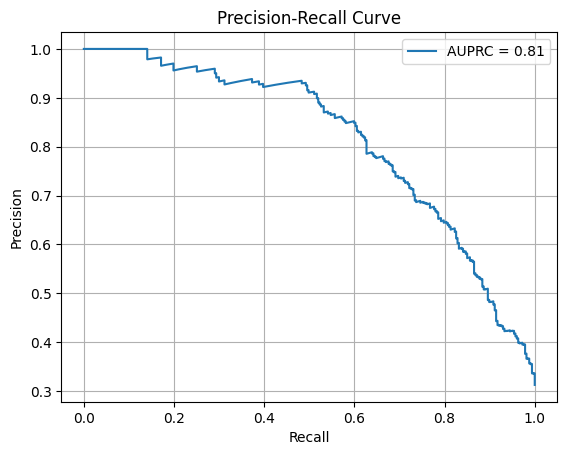


ROC Curve:


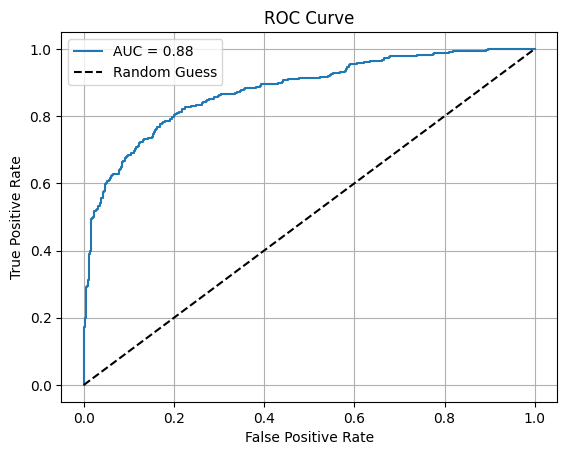


Mean F1 Score: 0.7981
Balanced Accuracy: 0.7910
Average AUPRC: 0.8141

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       719
           1       0.75      0.69      0.72       327

    accuracy                           0.83      1046
   macro avg       0.81      0.79      0.80      1046
weighted avg       0.83      0.83      0.83      1046

Fold No: 4
Epoch [1/100], Loss: 0.6971, Accuracy: 0.5153
Validation Loss: 0.7135, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6856, Accuracy: 0.5725
Validation Loss: 0.6465, Validation Accuracy: 0.6841
Epoch [3/100], Loss: 0.6766, Accuracy: 0.6080
Validation Loss: 0.6613, Validation Accuracy: 0.6928
Epoch [4/100], Loss: 0.6690, Accuracy: 0.6229
Validation Loss: 0.6874, Validation Accuracy: 0.6486
Epoch [5/100], Loss: 0.6592, Accuracy: 0.6531
Validation Loss: 0.6495, Validation Accuracy: 0.7131
Epoch [6/100], Loss: 0.6619, Accuracy: 0.6471
Validation Loss: 0.6793, V

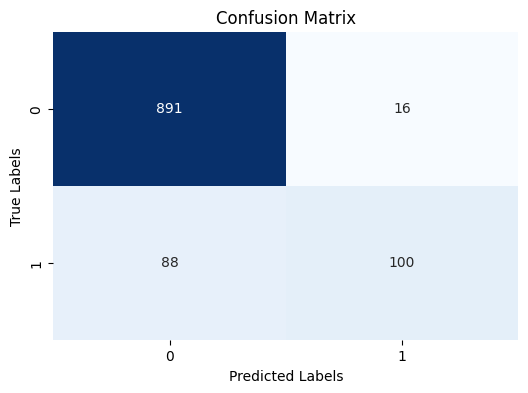


Class-wise Accuracy:
Class 0: 891/907 (98.24%)
Class 1: 100/188 (53.19%)

Precision-Recall Curve:


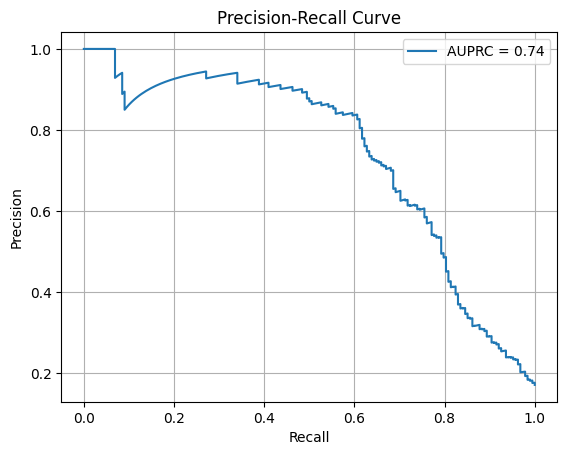


ROC Curve:


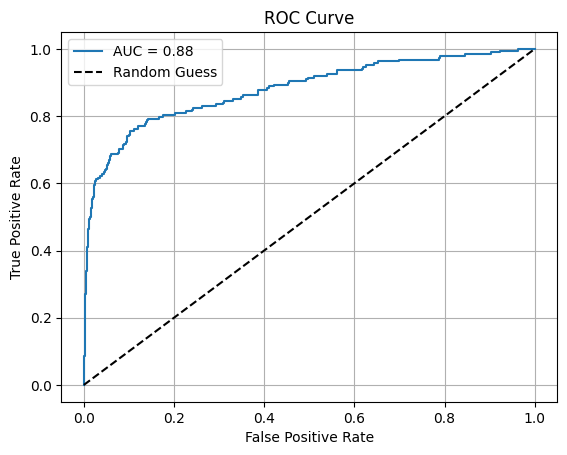


Mean F1 Score: 0.8014
Balanced Accuracy: 0.7571
Average AUPRC: 0.7396

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       907
           1       0.86      0.53      0.66       188

    accuracy                           0.91      1095
   macro avg       0.89      0.76      0.80      1095
weighted avg       0.90      0.91      0.90      1095

Fold No: 5
Epoch [1/100], Loss: 0.8125, Accuracy: 0.5000
Validation Loss: 0.5835, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.8131, Accuracy: 0.5000
Validation Loss: 0.5835, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.8132, Accuracy: 0.5000
Validation Loss: 0.5835, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.8133, Accuracy: 0.5000
Validation Loss: 0.5835, Validation Accuracy: 0.5000
Epoch [5/100], Loss: 0.8133, Accuracy: 0.5000
Validation Loss: 0.5835, Validation Accuracy: 0.5000
Epoch [6/100], Loss: 0.8133, Accuracy: 0.5000
Validation Loss: 0.5835, V

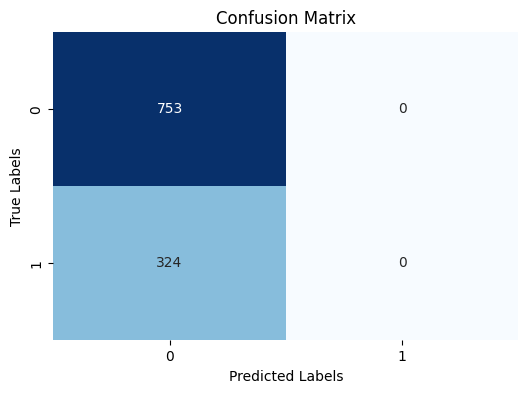


Class-wise Accuracy:
Class 0: 753/753 (100.00%)
Class 1: 0/324 (0.00%)

Precision-Recall Curve:


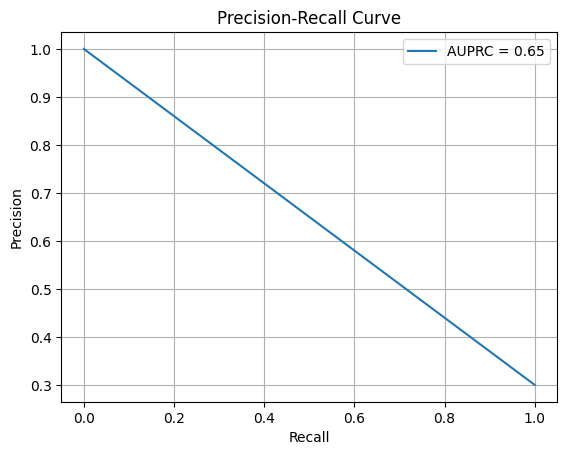


ROC Curve:


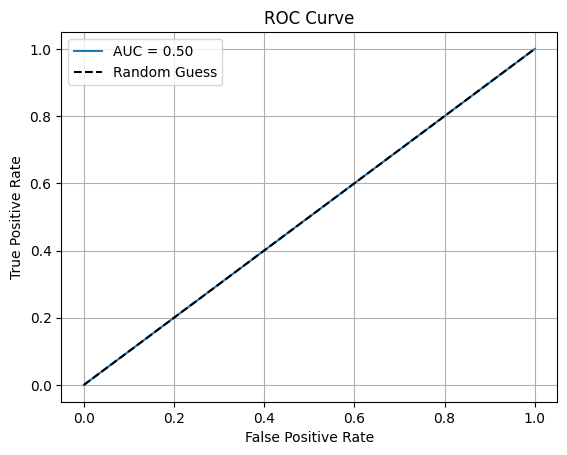


Mean F1 Score: 0.4115
Balanced Accuracy: 0.5000
Average AUPRC: 0.6504

Classification Report:


c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       753
           1       0.00      0.00      0.00       324

    accuracy                           0.70      1077
   macro avg       0.35      0.50      0.41      1077
weighted avg       0.49      0.70      0.58      1077


PARAMETER SET 3 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.6675
   Fold 2: 0.5996
   Fold 3: 0.7910
   Fold 4: 0.7571
   Fold 5: 0.5000

2) Average balanced accuracy across all folds: 0.6631

3) Average AUPRC across all folds: 0.7282

4) AUPRC per fold:
   Fold 1: 0.7346
   Fold 2: 0.7023
   Fold 3: 0.8141
   Fold 4: 0.7396
   Fold 5: 0.6504

5) Best fold class-wise accuracy (Fold 3):
   Class 0: 0.8971
   Class 1: 0.6850


RUNNING PARAMETER SET 4/5
Parameters: {'hidden_size': 256, 'num_layers': 3, 'dropout': 0.5, 'learning_rate': 6.227130451805968e-05, 'weight_decay': 2.7093785717647777e-06, 'batch_size': 16, 'optimizer_name': 'Adam', 'labe

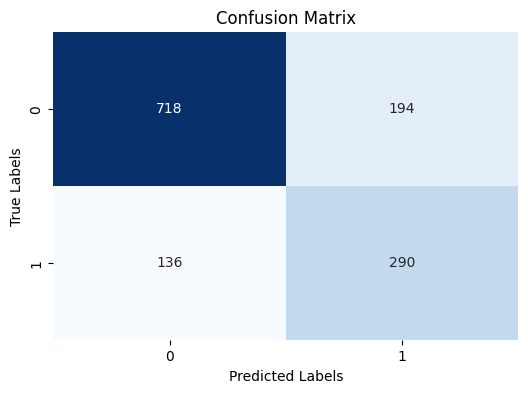


Class-wise Accuracy:
Class 0: 718/912 (78.73%)
Class 1: 290/426 (68.08%)

Precision-Recall Curve:


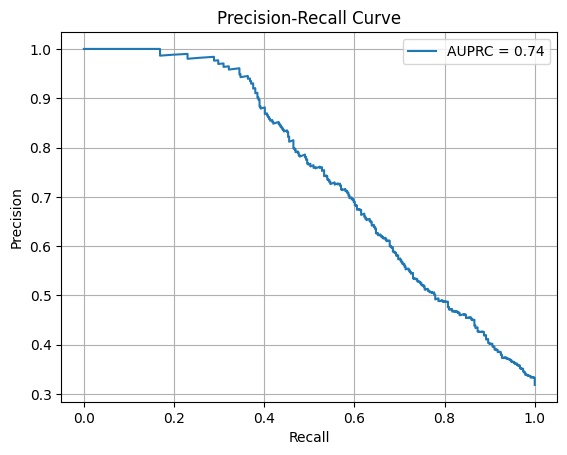


ROC Curve:


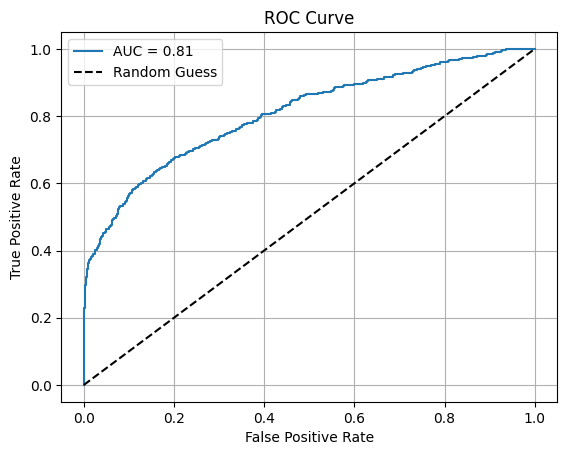


Mean F1 Score: 0.7252
Balanced Accuracy: 0.7340
Average AUPRC: 0.7447

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       912
           1       0.60      0.68      0.64       426

    accuracy                           0.75      1338
   macro avg       0.72      0.73      0.73      1338
weighted avg       0.76      0.75      0.76      1338

Fold No: 2
Epoch [1/100], Loss: 0.6849, Accuracy: 0.5757
Validation Loss: 0.6456, Validation Accuracy: 0.6296
Epoch [2/100], Loss: 0.6456, Accuracy: 0.6746
Validation Loss: 0.6370, Validation Accuracy: 0.6690
Epoch [3/100], Loss: 0.6410, Accuracy: 0.6859
Validation Loss: 0.6848, Validation Accuracy: 0.6507
Epoch [4/100], Loss: 0.6269, Accuracy: 0.7300
Validation Loss: 0.6779, Validation Accuracy: 0.6685
Epoch [5/100], Loss: 0.6221, Accuracy: 0.7342
Validation Loss: 0.6142, Validation Accuracy: 0.6700
Epoch [6/100], Loss: 0.6312, Accuracy: 0.7199
Validation Loss: 0.6128, V

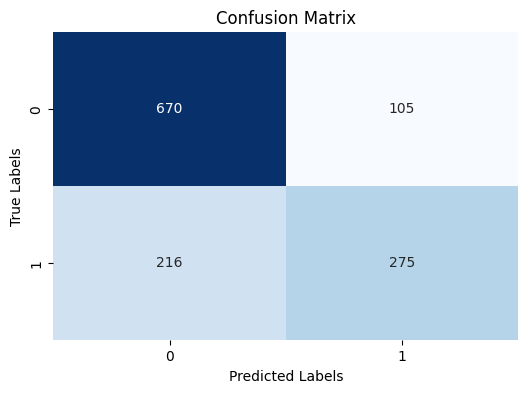


Class-wise Accuracy:
Class 0: 670/775 (86.45%)
Class 1: 275/491 (56.01%)

Precision-Recall Curve:


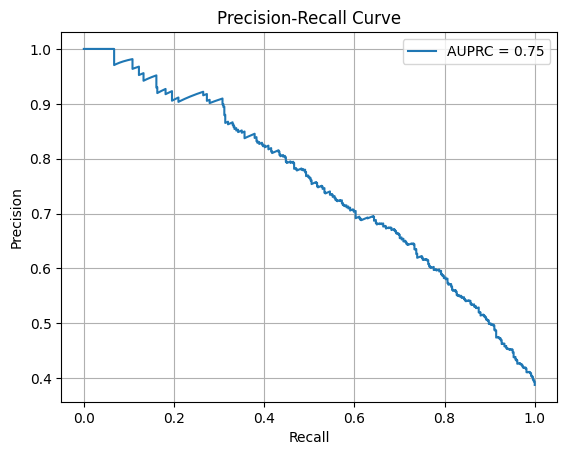


ROC Curve:


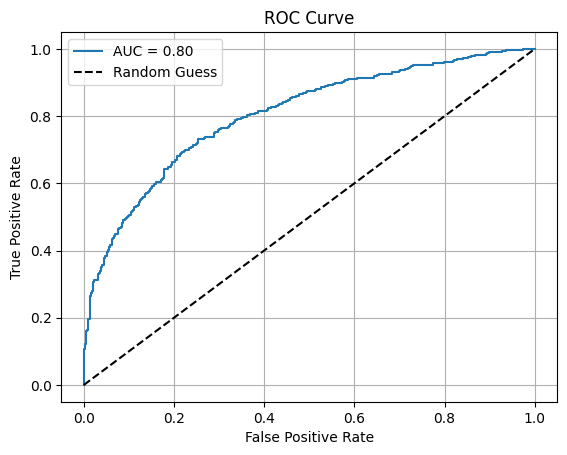


Mean F1 Score: 0.7191
Balanced Accuracy: 0.7123
Average AUPRC: 0.7522

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       775
           1       0.72      0.56      0.63       491

    accuracy                           0.75      1266
   macro avg       0.74      0.71      0.72      1266
weighted avg       0.74      0.75      0.74      1266

Fold No: 3
Epoch [1/100], Loss: 0.6809, Accuracy: 0.5917
Validation Loss: 0.6597, Validation Accuracy: 0.6304
Epoch [2/100], Loss: 0.6473, Accuracy: 0.6860
Validation Loss: 0.6792, Validation Accuracy: 0.6412
Epoch [3/100], Loss: 0.6395, Accuracy: 0.6951
Validation Loss: 0.7092, Validation Accuracy: 0.6155
Epoch [4/100], Loss: 0.6321, Accuracy: 0.7100
Validation Loss: 0.7517, Validation Accuracy: 0.6226
Epoch [5/100], Loss: 0.6363, Accuracy: 0.7058
Validation Loss: 0.6532, Validation Accuracy: 0.6136
Epoch [6/100], Loss: 0.6329, Accuracy: 0.7100
Validation Loss: 0.6738, V

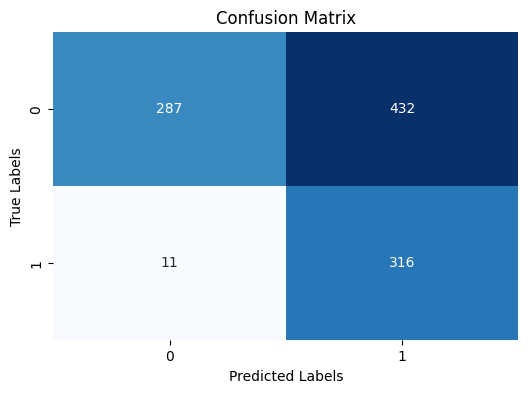


Class-wise Accuracy:
Class 0: 287/719 (39.92%)
Class 1: 316/327 (96.64%)

Precision-Recall Curve:


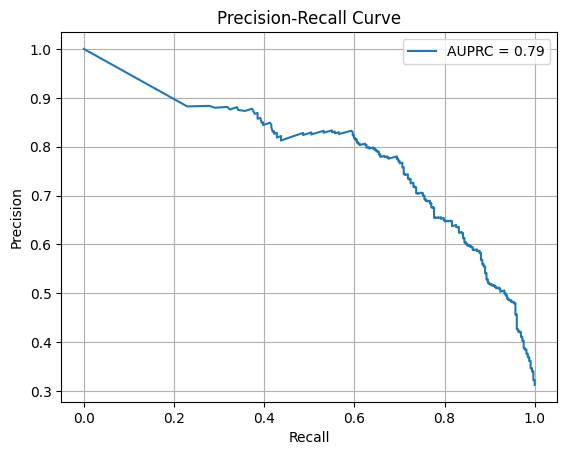


ROC Curve:


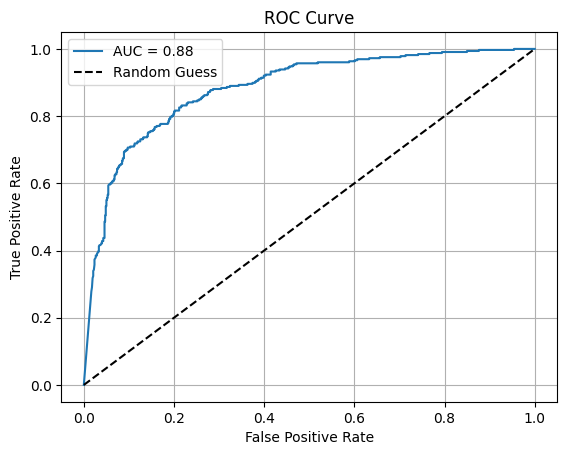


Mean F1 Score: 0.5762
Balanced Accuracy: 0.6828
Average AUPRC: 0.7859

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.40      0.56       719
           1       0.42      0.97      0.59       327

    accuracy                           0.58      1046
   macro avg       0.69      0.68      0.58      1046
weighted avg       0.79      0.58      0.57      1046

Fold No: 4
Epoch [1/100], Loss: 0.6776, Accuracy: 0.6003
Validation Loss: 0.6630, Validation Accuracy: 0.6756
Epoch [2/100], Loss: 0.6590, Accuracy: 0.6442
Validation Loss: 0.6847, Validation Accuracy: 0.6661
Epoch [3/100], Loss: 0.6545, Accuracy: 0.6632
Validation Loss: 0.6415, Validation Accuracy: 0.7174
Epoch [4/100], Loss: 0.6408, Accuracy: 0.6954
Validation Loss: 0.6227, Validation Accuracy: 0.7446
Epoch [5/100], Loss: 0.6378, Accuracy: 0.6994
Validation Loss: 0.5930, Validation Accuracy: 0.7570
Epoch [6/100], Loss: 0.6376, Accuracy: 0.7055
Validation Loss: 0.6071, V

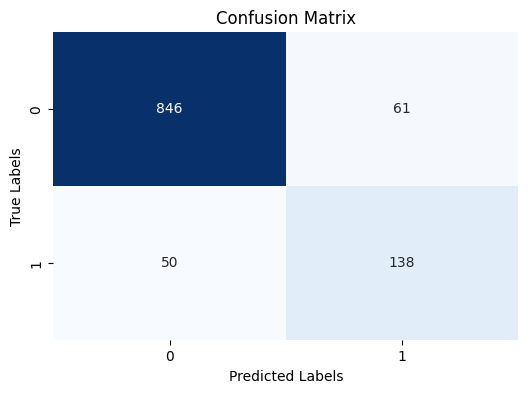


Class-wise Accuracy:
Class 0: 846/907 (93.27%)
Class 1: 138/188 (73.40%)

Precision-Recall Curve:


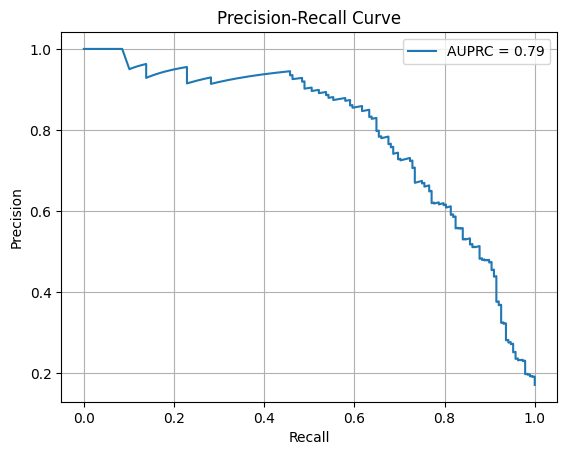


ROC Curve:


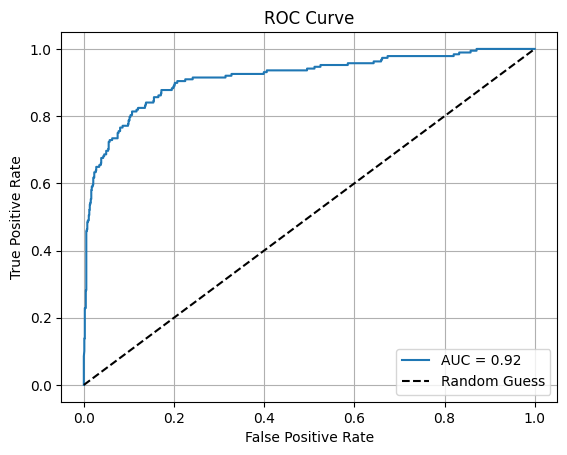


Mean F1 Score: 0.8258
Balanced Accuracy: 0.8334
Average AUPRC: 0.7925

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       907
           1       0.69      0.73      0.71       188

    accuracy                           0.90      1095
   macro avg       0.82      0.83      0.83      1095
weighted avg       0.90      0.90      0.90      1095

Fold No: 5
Epoch [1/100], Loss: 0.6829, Accuracy: 0.5587
Validation Loss: 0.7156, Validation Accuracy: 0.5806
Epoch [2/100], Loss: 0.6526, Accuracy: 0.6688
Validation Loss: 0.5644, Validation Accuracy: 0.6731
Epoch [3/100], Loss: 0.6492, Accuracy: 0.6668
Validation Loss: 0.7250, Validation Accuracy: 0.6772
Epoch [4/100], Loss: 0.6425, Accuracy: 0.6933
Validation Loss: 0.5680, Validation Accuracy: 0.5739
Epoch [5/100], Loss: 0.6383, Accuracy: 0.6957
Validation Loss: 0.6878, Validation Accuracy: 0.7094
Epoch [6/100], Loss: 0.6302, Accuracy: 0.7134
Validation Loss: 0.5530, V

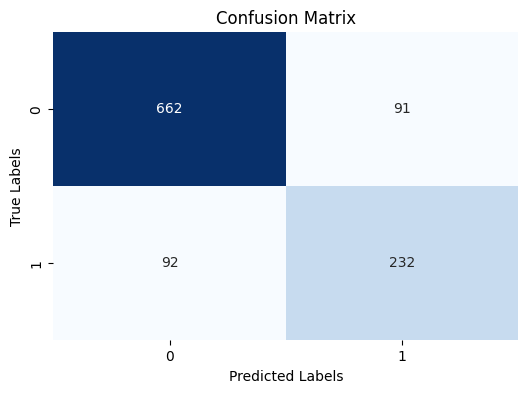


Class-wise Accuracy:
Class 0: 662/753 (87.92%)
Class 1: 232/324 (71.60%)

Precision-Recall Curve:


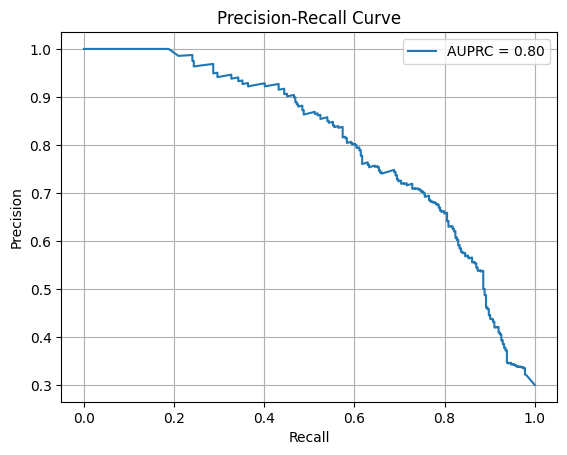


ROC Curve:


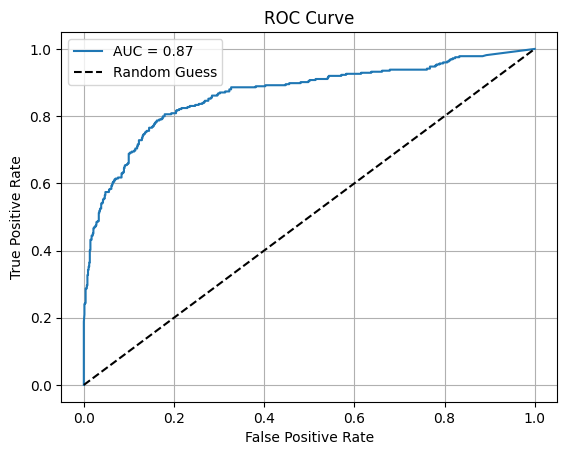


Mean F1 Score: 0.7979
Balanced Accuracy: 0.7976
Average AUPRC: 0.8036

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       753
           1       0.72      0.72      0.72       324

    accuracy                           0.83      1077
   macro avg       0.80      0.80      0.80      1077
weighted avg       0.83      0.83      0.83      1077


PARAMETER SET 4 RESULTS SUMMARY

1) Balanced accuracy for each fold:
   Fold 1: 0.7340
   Fold 2: 0.7123
   Fold 3: 0.6828
   Fold 4: 0.8334
   Fold 5: 0.7976

2) Average balanced accuracy across all folds: 0.7520

3) Average AUPRC across all folds: 0.7758

4) AUPRC per fold:
   Fold 1: 0.7447
   Fold 2: 0.7522
   Fold 3: 0.7859
   Fold 4: 0.7925
   Fold 5: 0.8036

5) Best fold class-wise accuracy (Fold 4):
   Class 0: 0.9327
   Class 1: 0.7340


RUNNING PARAMETER SET 5/5
Parameters: {'hidden_size': 1024, 'num_layers': 2, 'dropout': 0.4, 'learning_rate': 0.00014991153316

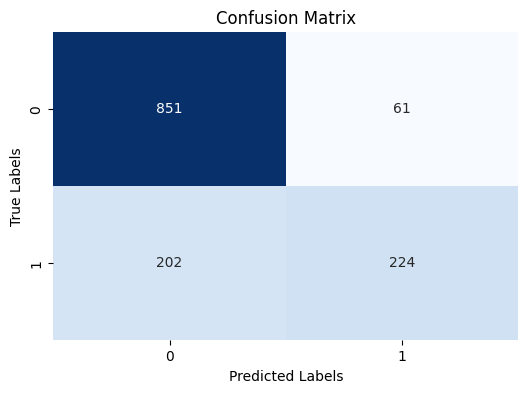


Class-wise Accuracy:
Class 0: 851/912 (93.31%)
Class 1: 224/426 (52.58%)

Precision-Recall Curve:


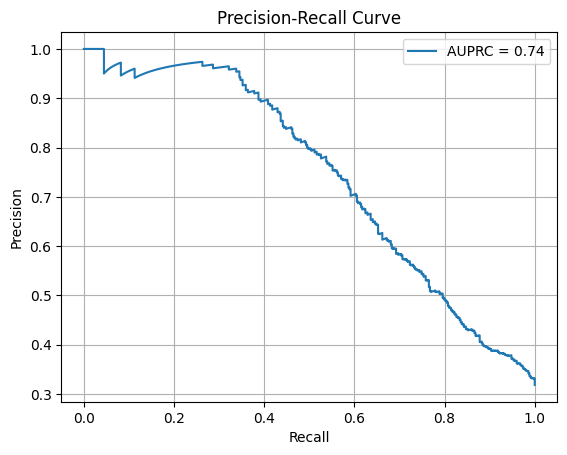


ROC Curve:


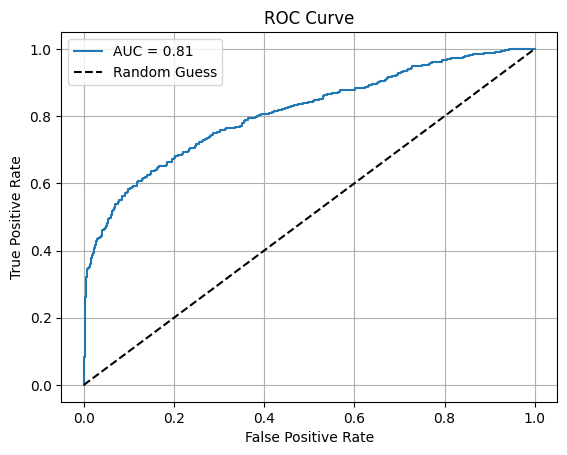


Mean F1 Score: 0.7481
Balanced Accuracy: 0.7295
Average AUPRC: 0.7425

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       912
           1       0.79      0.53      0.63       426

    accuracy                           0.80      1338
   macro avg       0.80      0.73      0.75      1338
weighted avg       0.80      0.80      0.79      1338

Fold No: 2
Epoch [1/100], Loss: 0.6760, Accuracy: 0.6043
Validation Loss: 0.6314, Validation Accuracy: 0.6169
Epoch [2/100], Loss: 0.6589, Accuracy: 0.6615
Validation Loss: 0.6583, Validation Accuracy: 0.6929
Epoch [3/100], Loss: 0.6360, Accuracy: 0.6973
Validation Loss: 0.6424, Validation Accuracy: 0.7183
Epoch [4/100], Loss: 0.6259, Accuracy: 0.7294
Validation Loss: 0.5996, Validation Accuracy: 0.7445
Epoch [5/100], Loss: 0.6252, Accuracy: 0.7282
Validation Loss: 0.6234, Validation Accuracy: 0.6309
Epoch [6/100], Loss: 0.6363, Accuracy: 0.7193
Validation Loss: 0.6028, V

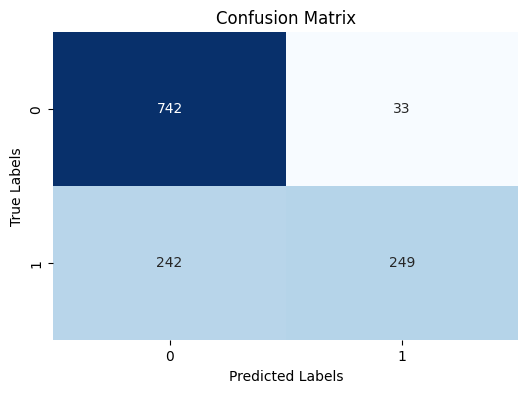


Class-wise Accuracy:
Class 0: 742/775 (95.74%)
Class 1: 249/491 (50.71%)

Precision-Recall Curve:


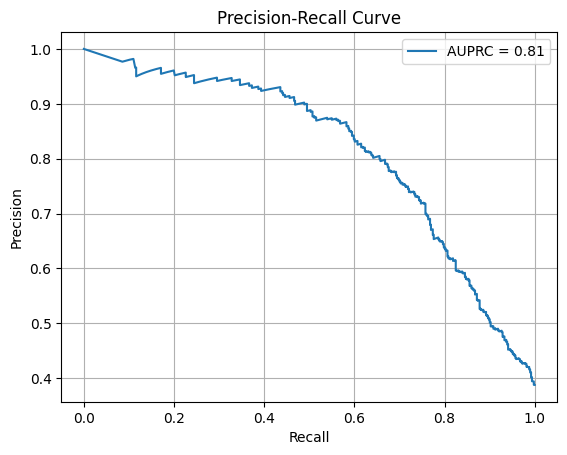


ROC Curve:


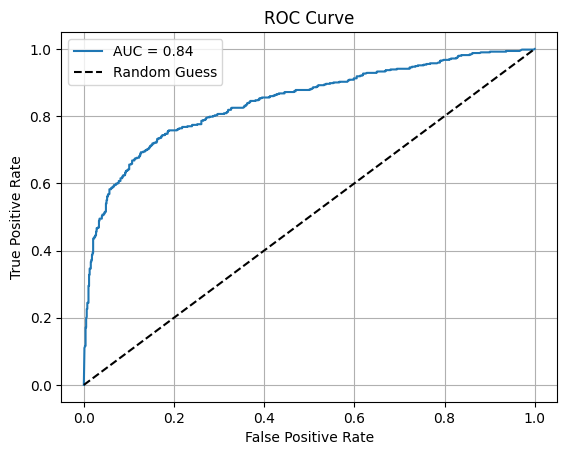


Mean F1 Score: 0.7440
Balanced Accuracy: 0.7323
Average AUPRC: 0.8149

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       775
           1       0.88      0.51      0.64       491

    accuracy                           0.78      1266
   macro avg       0.82      0.73      0.74      1266
weighted avg       0.80      0.78      0.77      1266

Fold No: 3
Epoch [1/100], Loss: 0.6835, Accuracy: 0.5826
Validation Loss: 0.7671, Validation Accuracy: 0.5508
Epoch [2/100], Loss: 0.6508, Accuracy: 0.6722
Validation Loss: 0.6835, Validation Accuracy: 0.5339
Epoch [3/100], Loss: 0.6488, Accuracy: 0.6855
Validation Loss: 0.6820, Validation Accuracy: 0.5277
Epoch [4/100], Loss: 0.6404, Accuracy: 0.7079
Validation Loss: 0.6179, Validation Accuracy: 0.6913
Epoch [5/100], Loss: 0.6413, Accuracy: 0.6962
Validation Loss: 0.7152, Validation Accuracy: 0.5214
Epoch [6/100], Loss: 0.6431, Accuracy: 0.6924
Validation Loss: 0.6243, V

KeyboardInterrupt: 

In [22]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

top_params  = [
    # Trial 45: Test Accuracy = 0.5825
    {
        'hidden_size': 128,
        'num_layers': 4,
        'dropout': 0.4,
        'learning_rate': 6.339492809821357e-05,
        'weight_decay': 5.137548693679295e-06,
        'batch_size': 16,
        'optimizer_name': 'Adam',
        'label_smoothing': 0.3,
        'factor': 1
    },
    
    # Trial 8: Test Accuracy = 0.5570
    {
        'hidden_size': 512,
        'num_layers': 1,
        'dropout': 0.30000000000000004,
        'learning_rate': 1.6047306777985417e-06,
        'weight_decay': 1.6488292763592139e-06,
        'batch_size': 10,
        'optimizer_name': 'Adam',
        'label_smoothing': 0.3,
        'factor': 1
    },
    
    # Trial 150: Test Accuracy = 0.5514
    {
        'hidden_size': 1024,
        'num_layers': 2,
        'dropout': 0.5,
        'learning_rate': 0.00032747731661669424,
        'weight_decay': 2.1882109116149925e-06,
        'batch_size': 10,
        'optimizer_name': 'Adam',
        'label_smoothing': 0.3,
        'factor': 1
    },
    
    # Trial 218: Test Accuracy = 0.5520 (but value was 0.5520485537821807 which is lower than trial 23)
    # Trial 23: Test Accuracy = 0.5459
    {
        'hidden_size': 256,
        'num_layers': 3,
        'dropout': 0.5,
        'learning_rate': 6.227130451805968e-05,
        'weight_decay': 2.7093785717647777e-06,
        'batch_size': 16,
        'optimizer_name': 'Adam',
        'label_smoothing': 0.3,
        'factor': 1
    },
    
    # Trial 144: Test Accuracy = 0.5454
    {
        'hidden_size': 1024,
        'num_layers': 2,
        'dropout': 0.4,
        'learning_rate': 0.00014991153316823257,
        'weight_decay': 2.666257997890808e-06,
        'batch_size': 16,
        'optimizer_name': 'Adam',
        'label_smoothing': 0.3,
        'factor': 1
    }
]

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

# Model and training configurations
num_classes = 2
input_size = 224 * 3
epochs = 100
input_size = 224*3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file

    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }

    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc

    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)

    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])

    # Check if file exists
    file_exists = os.path.isfile(csv_path)

    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")
    
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Loop through all parameter sets
for param_idx, params in enumerate(top_params):
    print(f"\n{'='*80}")
    print(f"RUNNING PARAMETER SET {param_idx + 1}/5")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Extract parameters
    hidden_size = params["hidden_size"]
    num_layers = params.get("num_layers", 1)
    dropout = params["dropout"]
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']

    # Initialize lists for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')

        # Initialize model, loss, and optimizer
        fold_model = LstmAttention(
              input_size=input_size,
              hidden_size=hidden_size,
              num_layers=num_layers,
              num_classes=num_classes,
              dropout=dropout
              ).to(device)

        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)

        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],train_data.shape[2]*train_data.shape[3]))
        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)

        early_stopping = EarlyStopping(patience=10)

        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold]
            val_data = val_data.reshape((val_data.shape[0],val_data.shape[1],val_data.shape[2]*val_data.shape[3]))  # reshape to lstm input shape
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold]
        test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*test_data.shape[3]))  # reshape to lstm input shape
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Calculate class-wise accuracy
        class_accuracies = cm.diagonal() / cm.sum(axis=1)
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)

    # Find best fold based on balanced accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]

    print("\n" + "="*60)
    print(f"PARAMETER SET {param_idx + 1} RESULTS SUMMARY")
    print("="*60)

    print(f'\n1) Balanced accuracy for each fold:')
    for i, acc in enumerate(fold_accuracies):
        print(f'   Fold {i+1}: {acc:.4f}')

    print(f'\n2) Average balanced accuracy across all folds: {mean_accuracy:.4f}')

    print(f'\n3) Average AUPRC across all folds: {average_auprc:.4f}')

    print(f'\n4) AUPRC per fold:')
    for i, auprc in enumerate(fold_auprcs):
        print(f'   Fold {i+1}: {auprc:.4f}')

    print(f'\n5) Best fold class-wise accuracy (Fold {best_fold_idx+1}):')
    for i, class_acc in enumerate(best_fold_class_accuracies):
        print(f'   Class {i}: {class_acc:.4f}')

    print("\n" + "="*60)
    
    # Save results for this parameter set
    model_info = f"LstmAttention_paramset_{param_idx+1}_hidden_{hidden_size}_layers_{num_layers}_dropout_{dropout}"

print(f"\n{'='*80}")
print("ALL PARAMETER SETS COMPLETED!")
print(f"{'='*80}")
